In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%config InlineBackend.figure_format = "retina"
%matplotlib inline
plt.style.use("default")

In [11]:
EPOCHS = 2

In [12]:
jobs = pd.read_csv("../data/jobs.csv")
jobs

,title,introduction,description,profile,we_offer,gehalt_min_yearly,gehalt_max_yearly
0,(Junior) Data Scientist (m/w/d),Wir suchen in Voll- oder Teilzeit Wir suchen ...,Entwicklung und Implementierung von Algorith­m...,Berufserfahrung im oben genannten Aufgaben­ber...,Freie Hardwarewahl nach deinen Wünschen inkl. ...,48384,68712
1,Junior Data Scientist (m/w/d),TUI Cruises ist einer der führenden Kreuzfahrt...,"Du analysierst große, komplexe Datensätze mit ...",Bachelor Abschluss in (Wirtschafts-)Informatik...,Eine flexible Arbeitszeitkultur mit zwei Mobil...,42576,60972
2,Junior Data Scientist (m/f/x),TUI Cruises is one of the leading cruise provi...,"Analyze large, complex datasets to extract ins...","Bachelor’s degree in Computer Science, Data Sc...",A flexible working time culture with two mobil...,42576,60972
3,(Junior) Data Scientist / Data Analyst (w/m/d),Mit rund 15 Mio. Kundenverträgen und 3.200 Mit...,"Für unsere Abteilung ""Customer Decisioning"" su...",Gute Deutschkenntnisse in Wort und Schrift Er...,Attraktives Gehalt Vertrauensarbeitszeit mit ...,46452,73548
4,Junior Data Scientist (m/w/d) – Risikomodelle,Die Sparkassen Rating und Risikosysteme (SR) i...,Mitarbeit an Gremien- oder Kundenprojekten im ...,Abgeschlossenes Studium (ggf. Promotion) im Be...,Eine unbefristete Tätigkeit in einem hoch vers...,44520,61932
...,...,...,...,...,...,...,...
3598,(Junior) Analyst Anti-Financial Crime (AFC) (m...,Wir sind heute [movers] und morgen [shapers].A...,Du bringst Deine Erfahrung aus dem Studium / a...,Eine erfolgreich abgeschlossene Ausbildung zum...,Weiterbildung: umfangreiche fachliche und meth...,36780,52260
3599,(Junior) Process Analyst - Customer Service (m...,Wir sind eines der führenden Home-Healthcare-U...,Verantwortlicher Ansprechpartner und Koordinat...,"Bachelor in betriebswirtschaftlichem Bereich, ...",Ankommen leicht gemacht: Wir legen großen Wert...,44520,73548
3600,Structured Finance Data Analyst (m/f/d) Native...,Converting Data into Market Trust European Dat...,Develop and maintain close relationships with ...,Bachelor degree in Finance /Economics /Banking...,The opportunity to work in a data-driven marke...,41616,67740
3601,"Senior Business Analyst (m/w/d) Regulatory, Da...","HSBC Deutschland ist Teil der HSBC-Gruppe, ein...",Wir suchen Kollegen (m/w/d) mit Persönlichkeit...,Sie verfügen über ein erfolgreich abgeschlosse...,Work-Life Balance: Flexible Arbeitszeitmodelle...,62904,84192


In [13]:
jobs.isna().sum()

title                  0
introduction         378
description            0
profile                0
we_offer             183
gehalt_min_yearly      0
gehalt_max_yearly      0
dtype: int64

In [14]:
# fill na with empty string to avoid na
jobs["full_text"] = (
    jobs["title"].fillna("") + " "
    + jobs["introduction"].fillna("") + " "
    + jobs["description"].fillna("") + " "
    + jobs["profile"].fillna("") + " "
    + jobs["we_offer"].fillna("")
).str.strip()

In [15]:
jobs.isna().sum()

title                  0
introduction         378
description            0
profile                0
we_offer             183
gehalt_min_yearly      0
gehalt_max_yearly      0
full_text              0
dtype: int64

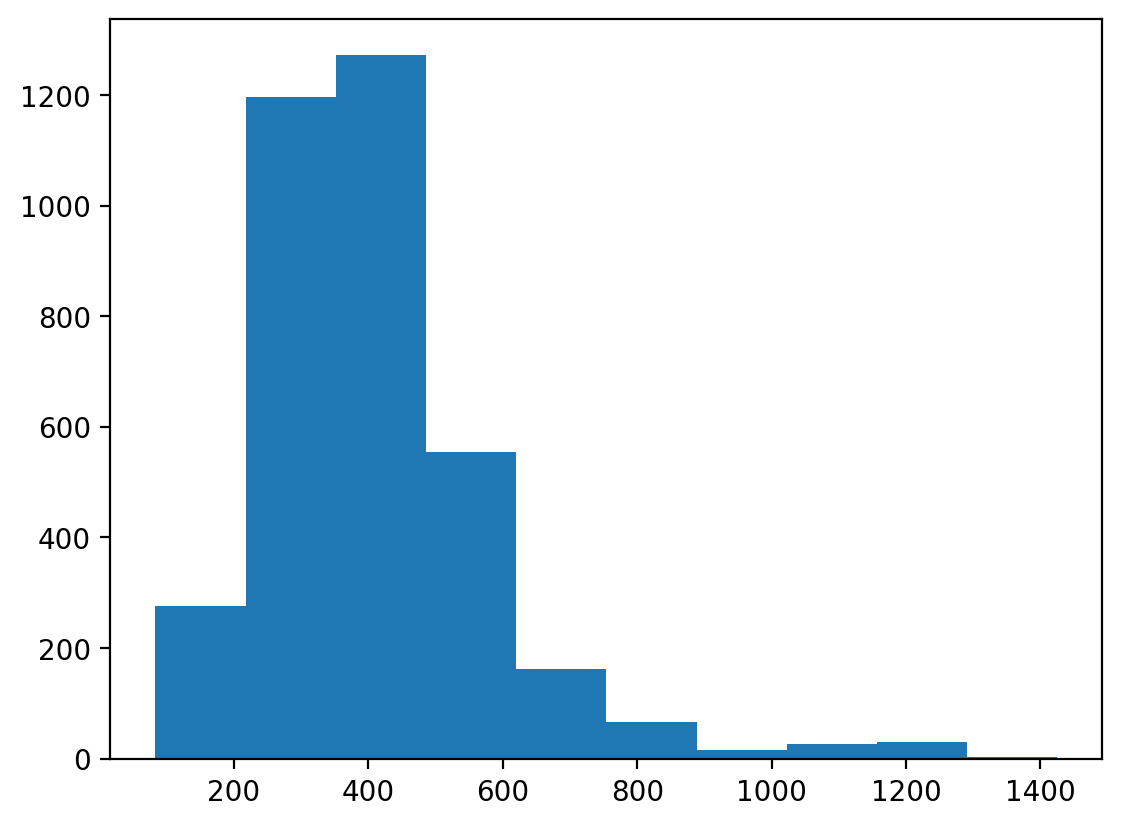

In [16]:
plt.hist([len(x.split()) for x in jobs["full_text"]])
plt.show()

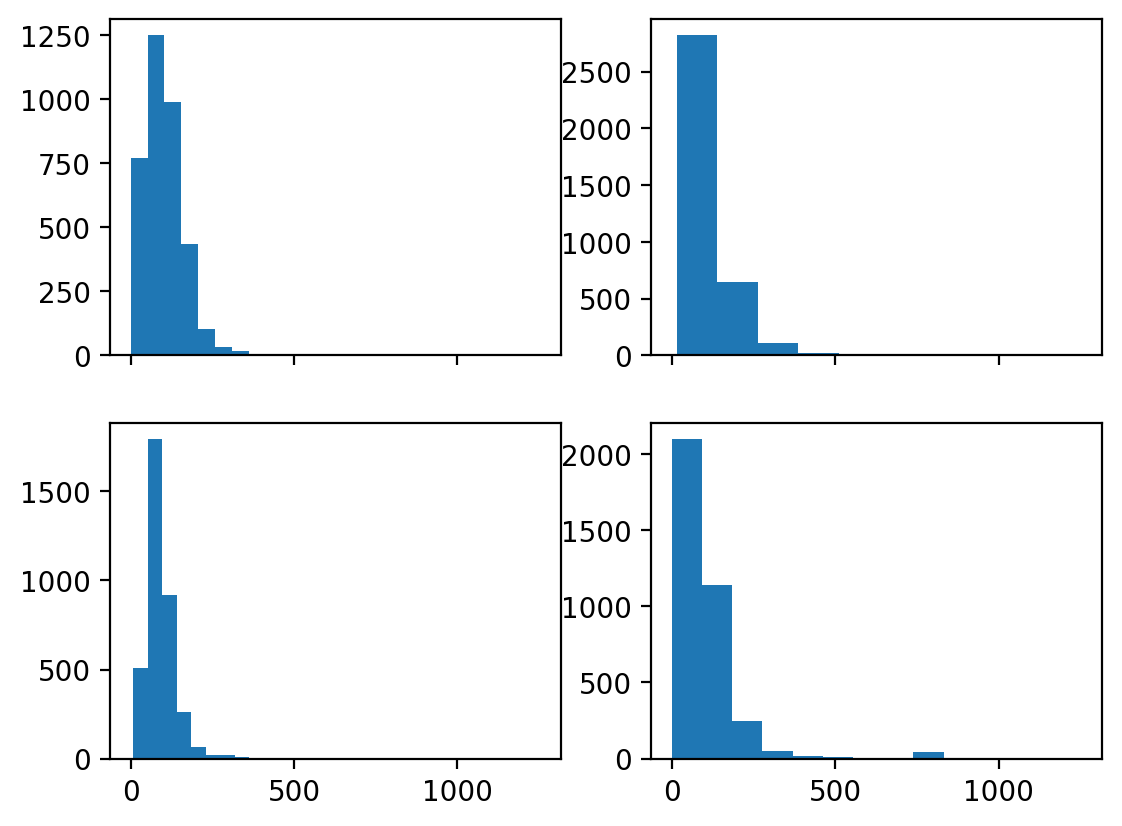

In [40]:
fig, axes = plt.subplots(2, 2, sharex=True)
cols = ["introduction", "description", "profile", "we_offer"]
for col, ax in zip(cols, axes.flat):
    ax.hist([len(x.split()) for x in jobs[col].fillna("")])
plt.show()

# No Finetuning for context
- deepset/gbert-base (german)
- google-bert/bert-base-multilingual-cased
- FacebookAI/xlm-roberta-base

In [17]:
model = "deepset/gbert-base"

In [18]:
from transformers import AutoTokenizer, TFAutoModel

# creating tokenizer
tokenizer = AutoTokenizer.from_pretrained(model, padding="right")

# creating model
base_model = TFAutoModel.from_pretrained(model, from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

In [19]:
# Deciding on padding/truncating sentences
df = jobs[["full_text"]]

Token indices sequence length is longer than the specified maximum sequence length for this model (578 > 512). Running this sequence through the model will result in indexing errors
/var/folders/nj/htf647kx68gdktgjb6y8_5qw0000gn/T/ipykernel_95730/848963368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tokenized"] = df["full_text"].map(lambda x: tokenizer(x)["input_ids"])
/var/folders/nj/htf647kx68gdktgjb6y8_5qw0000gn/T/ipykernel_95730/848963368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

<Axes: >

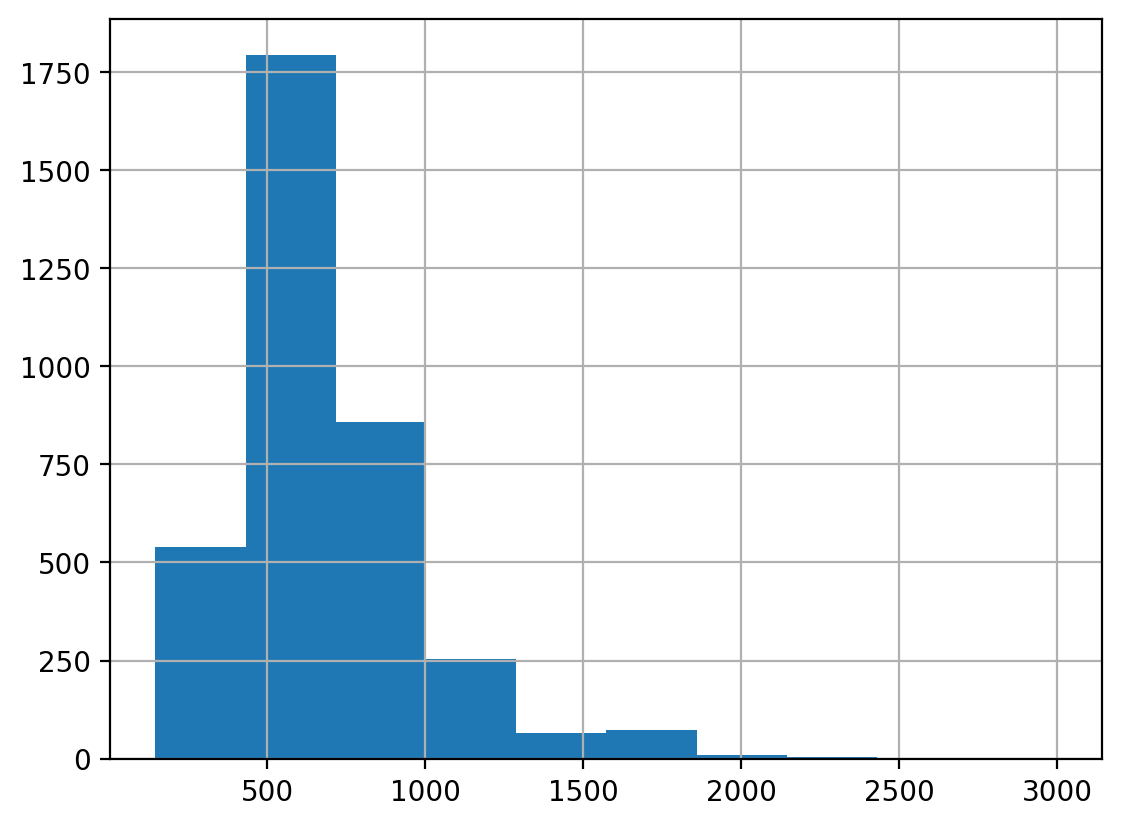

In [21]:
df["tokenized"] = df["full_text"].map(lambda x: tokenizer(x)["input_ids"])

df["len_tokenized"] = df["tokenized"].map(lambda x: len(x))

df["len_tokenized"].hist()

In [23]:
max_length = 512
# encoding
encodings = tokenizer(
    jobs["full_text"].tolist(),
    max_length=max_length,
    truncation=True,
    padding="max_length",
    return_tensors="tf"
    )
input_ids = encodings["input_ids"]

In [41]:
# Getting embeddings
embeddings = base_model.predict(input_ids)

113/113 [==============================] - 613s 5s/step


ResourceExhaustedError: {{function_node __wrapped__ConcatV2_N_113_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[3603,512,768] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator Simple allocator [Op:ConcatV2] name: concat

In [ ]:
# taking only the first element of the hidden state, to reduce data
X = embeddings["last_hidden_state"][:, 0, :]
y = tf.constant(
    jobs.apply(lambda x: (x["gehalt_min_yearly"], x["gehalt_max_yearly"])),
    dtype=tf.float32
)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape

In [ ]:
import tensorflow as tf
es = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, activation="linear"), input_dim=X_train.shape[1])
model.summary()

In [ ]:
model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=EPOCHS, callbacks=[es], validation_split=0.2)
model.evaluate(X_test, y_test)

# Fine tuning

In [ ]:
# creating tokenizer
tokenizer = AutoTokenizer.from_pretrained(model, padding="right")

# creating model
base_model = TFAutoModel.from_pretrained(model, from_pt=True)

In [ ]:
# Eingangsdimensionen definieren
input_ids = tf.keras.layers.Input(shape=(512,),
                                  dtype=tf.int32,
                                  name="input_ids")
attention_mask = tf.keras.layers.Input(shape=(512,),
                                       dtype=tf.int32,
                                       name="attention_mask")

In [ ]:
outputs = base_model(input_ids, attention_mask=attention_mask)
hidden_states = outputs.last_hidden_state
pooled_output = tf.reduce_mean(hidden_states, axis=1)

In [ ]:
regression_output = tf.keras.layers.Dense(2,
                                          activation='linear',
                                          name='regression_output')(pooled_output)

In [ ]:
model = tf.keras.Model(
    inputs=[input_ids, attention_mask],
    outputs=regression_output
)
model.summary()

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mse", "mae"])

In [ ]:
text_train, text_test, y_train, y_test = train_test_split(jobs["full_text"].to_list(), y)

# encoding
train_encodings = tokenizer(
    text_train,
    max_length=max_length,
    truncation=True,
    padding="max_length",
    return_tensors="tf"
    )

test_encodings = tokenizer(
    text_test,
    max_length=max_length,
    truncation=True,
    padding="max_length",
    return_tensors="tf"
    )

input_ids_train = train_encodings["input_ids"]
attention_mask_train = train_encodings["attention_mask"]
y_train = tf.constant(y_train, dtype=tf.float32)

input_ids_test = test_encodings["input_ids"]
attention_mask_test = test_encodings["attention_mask"]
y_test = tf.constant(y_test, dtype=tf.float32)

In [ ]:
es = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(
    [input_ids_train, attention_mask_train],
    y_train,
    batch_size=32,
    epochs=EPOCHS,
    callbacks=[es],
    validation_split=0.2)

model.evaluate(
    [input_ids_test, attention_mask_test],
    y_test)